open clicked
/home/deepak/Desktop/projectGUI/b.jpg
no file


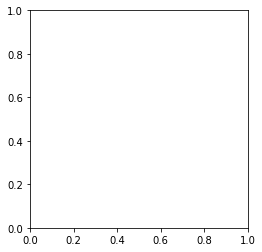

In [18]:
from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image
import numpy as np
import sys
print(sys.version)


# from skimage import io
# from skimage import filters
# import matplotlib.pyplot as plt




####function definitions
def btnOpenFunction(event):
    print("open clicked")

    filename = filedialog.askopenfilename(initialdir = "./",title = "Select file",filetypes = (("jpeg files","*.jpg"),("png files","*.png"),("all files","*.*")))
    print (filename)

    try:
        imageMat = getImage(filename)

        #load image into left frame
        for widget in leftFrame.winfo_children():
            widget.destroy()
            
            
        statusLabel.config(text="Loading image...")

        leftFrameLabel = Label(leftFrame,image=imageMat)#,width=480,height=320)
        leftFrameLabel.image=imageMat
        leftFrameLabel.pack(fill=X)
  
        statusLabel.config(text="Test Image Loaded")



    except:
        print("no file")
        statusLabel.config(text="No Image selected!")




def doNothing(event):
    print("doing nothing")

def btnRunFunction(event):
    print("run clicked")

    filename = filedialog.askopenfilename(initialdir = "./",title = "Select file",filetypes = (("jpeg files","*.jpg"),("png files","*.png"),("all files","*.*")))
    print (filename)
    try:
        imageMat = getImage(filename)

        #load image into left frame
        for widget in middleFrame.winfo_children():
            widget.destroy()
            
            
        statusLabel.config(text="Loading image...")
        print(type(imageMat))

        npImg = np.array(imageMat)
        print(type(npImg))
        npImg = npImg+50

        imageMatNew = ImageTk.PhotoImage(Image.fromarray(npImg))

        print(type(imageMat))

        middleFrameLabel = Label(middleFrame,image=imageMatNew)#,width=480,height=320)
        middleFrameLabel.image=imageMatNew
        middleFrameLabel.pack(fill=X)
  
        statusLabel.config(text="Test Image Loaded")



    except Exception as e:
        print(e)
        print("no file")
        statusLabel.config(text="No Image selected!")
        

def getImage(filePath):
    openedImage = Image.open(filePath)
    openedImage = openedImage.resize((480, 320), Image.ANTIALIAS)
    photo = ImageTk.PhotoImage(openedImage)

    return photo 




#### ui definitions
root = Tk()

root.geometry('1020x340+100+100')

leftFrame = Frame(root,bg="red",height=320)
middleFrame = Frame(root,bg="white",height=320)
rightFrame=Frame(root,bg="yellow",height=320)
bottomFrame=Frame(root,bg='green',height=32)

leftFrame.grid_columnconfigure(0,weight=1)
middleFrame.grid_columnconfigure(0,weight=1)
rightFrame.grid_columnconfigure(0,weight=1)
bottomFrame.grid_columnconfigure(0,weight=1)


leftFrame.grid(row=0,column=0)#sticky=W)
middleFrame.grid(row=0,column=1)#,sticky=W)
rightFrame.grid(row=0,column=2)#,sticky=E)
bottomFrame.grid(row=1,columnspan=3)

openButton = Button(rightFrame,text="OPEN")
openButton.grid(row=0,column=0,sticky="nsew")
openButton.bind("<Button-1>",btnOpenFunction)

runButton = Button(rightFrame,text="RUN")
runButton.grid(row=1,column=0,sticky="nsew")
runButton.bind("<Button-1>",btnRunFunction)


##remove this following image or replace it with another image
openedImage = Image.open("b.jpg")
openedImage = openedImage.resize((250, 250), Image.ANTIALIAS)
photo = ImageTk.PhotoImage(openedImage)  


leftFrameLabel = Label(leftFrame,image=photo,width=480,height=320)#,text="Test Image will be displayed here")
leftFrameLabel.pack(fill=X)

middleFrameLabel = Label(middleFrame,image=photo,width=480,height=320)#text="Result Image will be displayed here")
middleFrameLabel.pack(fill=X)


#status bar
statusLabel = Label(bottomFrame,text="Status goes here...", bd=1, relief=SUNKEN, anchor=S)
statusLabel.grid(sticky="nsew")#(side=BOTTOM, fill=X)


root.mainloop()


